In [1]:
import pandas as pd
import numpy as np

In [2]:
district_data = pd.read_csv("../data/processed/districtAll.csv")
welcomeAnalysis = pd.read_csv("../data/processed/wellcomeAnalysis.csv")

In [3]:
cut_welcome = welcomeAnalysis[['latitude','longitude','num_bus_stops_within_1km','district']]

In [4]:
district_data.head()

,district,latitude,longitude,Total,Average household sie,Median income
0,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0
1,Eastern,22.27722,114.22519,188400.0,2.8,31500.0
2,Islands District,22.26382,113.96038,67400.0,2.7,28800.0
3,Kowloon City District,22.32866,114.19121,146500.0,2.7,29700.0
4,Kwai Tsing,22.35288,114.10004,176600.0,2.7,23300.0


In [5]:
welcomeAnalysis.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude,longitude,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district
0,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'sto...",22.283245,114.155105,116,5,4,Central and Western District
1,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'sto...",22.324410,114.160454,117,6,14,Sham Shui Po
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'sto...",22.306436,114.171362,98,3,13,Yau Tsim Mong
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'sto...",22.315173,114.164415,94,5,15,Yau Tsim Mong
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'sto...",22.310417,114.225745,78,3,4,Kwon Tong


In [6]:
merged = welcomeAnalysis.merge(district_data, how='left', on='district')

In [7]:
merged.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude_x,longitude_x,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district,latitude_y,longitude_y,Total,Average household sie,Median income
0,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'sto...",22.283245,114.155105,116,5,4,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0
1,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'sto...",22.324410,114.160454,117,6,14,Sham Shui Po,22.32989,114.16250,164700.0,2.6,22000.0
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'sto...",22.306436,114.171362,98,3,13,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'sto...",22.315173,114.164415,94,5,15,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'sto...",22.310417,114.225745,78,3,4,Kwon Tong,22.31326,114.22581,247400.0,2.7,22200.0


In [8]:
district_shop = merged.groupby('district').count()[['latitude_x']]
district_shop.rename(columns={"latitude_x": "shop_count_in_district"},inplace=True)
print(district_shop)

                              shop_count_in_district
district                                            
Central and Western District                      12
Eastern                                            3
Islands District                                   2
Kowloon City District                              3
Kwai Tsing                                        10
Kwon Tong                                          8
North                                              1
Sha Tin                                            4
Sham Shui Po                                      21
Southern                                           3
Tai Po District                                    2
Tsuen Wan District                                18
Wan Chai                                           9
Wong Tai Sin                                       5
Yau Tsim Mong                                     21
Yuen Long District                                 1


In [9]:
merged1 = merged.merge(district_shop, how='left',on = 'district')

In [10]:
merged1.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude_x,longitude_x,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district,latitude_y,longitude_y,Total,Average household sie,Median income,shop_count_in_district
0,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'sto...",22.283245,114.155105,116,5,4,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0,12
1,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'sto...",22.324410,114.160454,117,6,14,Sham Shui Po,22.32989,114.16250,164700.0,2.6,22000.0,21
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'sto...",22.306436,114.171362,98,3,13,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,21
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'sto...",22.315173,114.164415,94,5,15,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,21
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'sto...",22.310417,114.225745,78,3,4,Kwon Tong,22.31326,114.22581,247400.0,2.7,22200.0,8


In [11]:
merged1['cust_num'] = merged1['Total'] / merged1['shop_count_in_district']
merged1['spend_per_cust'] = merged1['Median income'] * 0.05 * 12
merged1['sales_volume'] = merged1['spend_per_cust'] * merged1['cust_num']

In [12]:
import math
merged1['sales_volume'] = [math.log(x) for x in merged1['sales_volume']]

In [13]:
merged1.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude_x,longitude_x,num_bus_stops_within_1km,num_mtr_station_within_1km,...,district,latitude_y,longitude_y,Total,Average household sie,Median income,shop_count_in_district,cust_num,spend_per_cust,sales_volume
0,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'sto...",22.283245,114.155105,116,5,...,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0,12,7308.333333,25200.0,19.031370
1,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'sto...",22.324410,114.160454,117,6,...,Sham Shui Po,22.32989,114.16250,164700.0,2.6,22000.0,21,7842.857143,13200.0,18.455331
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'sto...",22.306436,114.171362,98,3,...,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,21,5885.714286,16740.0,18.405840
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'sto...",22.315173,114.164415,94,5,...,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,21,5885.714286,16740.0,18.405840
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'sto...",22.310417,114.225745,78,3,...,Kwon Tong,22.31326,114.22581,247400.0,2.7,22200.0,8,30925.000000,13320.0,19.836342


(array([60., 21., 10., 13.,  5.,  3.,  9.,  1.,  0.,  1.]),
 array([18.40583973, 18.77113875, 19.13643776, 19.50173678, 19.8670358 ,
        20.23233482, 20.59763383, 20.96293285, 21.32823187, 21.69353089,
        22.0588299 ]),
 <BarContainer object of 10 artists>)

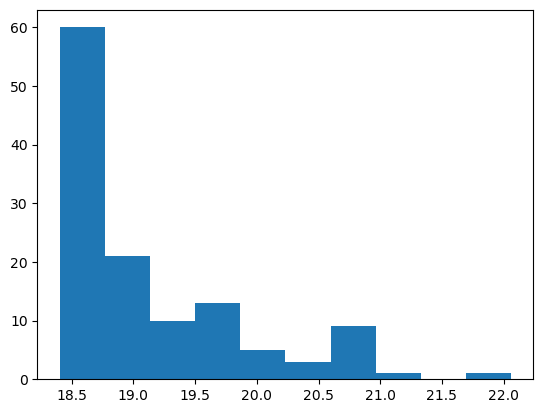

In [14]:
import matplotlib.pyplot as plt
plt.hist(merged1['sales_volume'])

In [15]:
# import statsmodels.api as sm

# y = merged1['sales_volume']
# x = merged1[['num_bus_stops_within_1km','Total household in district','Median income']]

# model = sm.OLS(y,x).fit()
# print(model.summary())

In [16]:
import statsmodels.api as sm

y = merged1['sales_volume']
x = merged1[['num_bus_stops_within_1km','num_mtr_station_within_1km','num_competitor_within_1km']]

model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           sales_volume   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              193.9
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                    7.61e-46
Time:                        15:34:21   Log-Likelihood:                         -428.97
No. Observations:                 123   AIC:                                      863.9
Df Residuals:                     120   BIC:                                      872.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [17]:
merged1.to_csv('merged1.csv')

# adress_optimization

In [18]:
zoneAnalysis = pd.read_csv("../data/processed/zoneAnalysis.csv")
zoneAnalysis.head()

,name,lat1,lat2,lon1,lon2,Number_of_shop,ratingMean,Number_of_rating_Mean,Number_of_busStop,Number_of_Mtr,Number_of_competitor,district
0,001-001,22.188762,22.212864,113.839997,113.871762,0,NaN,NaN,0,0,0,NaN
1,001-002,22.188762,22.212864,113.871762,113.903527,0,NaN,NaN,0,0,0,NaN
2,001-003,22.188762,22.212864,113.903527,113.935292,0,NaN,NaN,0,0,0,NaN
3,001-004,22.188762,22.212864,113.935292,113.967057,0,NaN,NaN,0,0,0,NaN
4,001-005,22.188762,22.212864,113.967057,113.998822,0,NaN,NaN,0,0,0,NaN


In [19]:
x_new = zoneAnalysis[['Number_of_busStop','Number_of_Mtr','Number_of_competitor']]
predict = model.predict(x_new)
zoneAnalysis['predicted_sales'] = predict

In [20]:
x1 = 1
zoneAnalysis['has_shop'] = [1 if i>0 else 0 for i in zoneAnalysis['Number_of_shop']]
zoneAnalysis['rent'] = zoneAnalysis['predicted_sales'] * 0.08 
zoneAnalysis['disposal'] = [math.log(300000) for i in zoneAnalysis['rent']] * zoneAnalysis['has_shop']
zoneAnalysis['cost_per_grid'] = (zoneAnalysis['disposal'] - zoneAnalysis['rent']) * x1

In [21]:
district_mapping = [
    {"name": "Central and Western", "lat_range": (22.265, 22.300), "lon_range": (114.120, 114.165)},
    {"name": "Eastern", "lat_range": (22.270, 22.320), "lon_range": (114.200, 114.265)},
    {"name": "Islands", "lat_range": (22.090, 22.330), "lon_range": (113.850, 114.050)},
    {"name": "Kowloon City", "lat_range": (22.310, 22.340), "lon_range": (114.180, 114.205)},
    {"name": "Kwai Tsing", "lat_range": (22.330, 22.370), "lon_range": (114.070, 114.135)},
    {"name": "Kwun Tong", "lat_range": (22.300, 22.350), "lon_range": (114.205, 114.260)},
    {"name": "North", "lat_range": (22.450, 22.570), "lon_range": (114.110, 114.240)},
    {"name": "Sai Kung", "lat_range": (22.300, 22.410), "lon_range": (114.220, 114.390)},
    {"name": "Sha Tin", "lat_range": (22.360, 22.440), "lon_range": (114.160, 114.250)},
    {"name": "Sham Shui Po", "lat_range": (22.320, 22.340), "lon_range": (114.150, 114.185)},
    {"name": "Southern", "lat_range": (22.200, 22.260), "lon_range": (114.110, 114.170)},
    {"name": "Tai Po", "lat_range": (22.420, 22.490), "lon_range": (114.160, 114.280)},
    {"name": "Tsuen Wan", "lat_range": (22.340, 22.410), "lon_range": (114.050, 114.150)},
    {"name": "Tuen Mun", "lat_range": (22.370, 22.460), "lon_range": (113.900, 114.020)},
    {"name": "Wan Chai", "lat_range": (22.270, 22.290), "lon_range": (114.170, 114.195)},
    {"name": "Wong Tai Sin", "lat_range": (22.340, 22.370), "lon_range": (114.180, 114.210)},
    {"name": "Yau Tsim Mong", "lat_range": (22.280, 22.320), "lon_range": (114.150, 114.185)},
    {"name": "Yuen Long", "lat_range": (22.390, 22.480), "lon_range": (113.950, 114.060)},
]

In [22]:
# Function to assign district based on latitude and longitude ranges
def assign_district(lat1, lat2, lon1, lon2):
    for district in district_mapping:
        if lat2 >= district["lat_range"][0] and lat1 <= district["lat_range"][1] and \
           lon2 >= district["lon_range"][0] and lon1 <= district["lon_range"][1]:
            return district["name"]
    return "Unknown"  # If no district matches

# Apply the function to assign districts to each row in the dataframe
zoneAnalysis['district'] = zoneAnalysis.apply(
    lambda row: assign_district(row['lat1'], row['lat2'], row['lon1'], row['lon2']), axis=1
)

zoneAnalysis.head()

,name,lat1,lat2,lon1,lon2,Number_of_shop,ratingMean,Number_of_rating_Mean,Number_of_busStop,Number_of_Mtr,Number_of_competitor,district,predicted_sales,has_shop,rent,disposal,cost_per_grid
0,001-001,22.188762,22.212864,113.839997,113.871762,0,NaN,NaN,0,0,0,Islands,0.0,0,0.0,0.0,0.0
1,001-002,22.188762,22.212864,113.871762,113.903527,0,NaN,NaN,0,0,0,Islands,0.0,0,0.0,0.0,0.0
2,001-003,22.188762,22.212864,113.903527,113.935292,0,NaN,NaN,0,0,0,Islands,0.0,0,0.0,0.0,0.0
3,001-004,22.188762,22.212864,113.935292,113.967057,0,NaN,NaN,0,0,0,Islands,0.0,0,0.0,0.0,0.0
4,001-005,22.188762,22.212864,113.967057,113.998822,0,NaN,NaN,0,0,0,Islands,0.0,0,0.0,0.0,0.0


In [23]:
zoneAnalysis.to_csv('zoneAnalysis1111.csv')

In [24]:
total_sales = zoneAnalysis['predicted_sales'].sum()
total_cost = zoneAnalysis['cost_per_grid'].sum()
#total_revenue = 

In [25]:
total_cost

266.4909001465739

In [26]:
from pulp import *

# Create a maximization problem
problem = LpProblem("example_mip", LpMaximize)

# Define variables
x = LpVariable('x', lowBound=0, cat='Integer')
y = LpVariable('y', lowBound=0, cat='Integer')

# Define objective function
problem += 2*x + 3*y

# Define constraints
problem += 4*x + 3*y <= 25
problem += x + y <= 8

# Print problem statement
print(problem)

# Solve the problem
status = problem.solve()

# Print the solution
print("Status:", LpStatus[status])
print("Optimal Solution:")
print("x =", value(x))
print("y =", value(y))
print("Objective Value =", value(problem.objective))

example_mip:
MAXIMIZE
2*x + 3*y + 0
SUBJECT TO
_C1: 4 x + 3 y <= 25

_C2: x + y <= 8

VARIABLES
0 <= x Integer
0 <= y Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/tungyuenlok/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/5462c27089614d9987ea36e67b039f9b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/5462c27089614d9987ea36e67b039f9b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 18 RHS
At line 21 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 24 - 0.00 seconds
Cgl0004I processed model has 2 rows, 2 columns (2 integer (0 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to